In [1]:
import cv2
import cv2.aruco as aruco
import numpy
from matplotlib import pyplot as plt

In [2]:
photo = cv2.imread('test5.jpg')
arucodict = aruco.Dictionary_get(aruco.DICT_ARUCO_ORIGINAL)
params = aruco.DetectorParameters_create()
corners, ids, rejectedpoints = aruco.detectMarkers(photo, arucodict, parameters=params)

In [3]:
aruco.drawDetectedMarkers(photo, corners, ids)
aruco.drawDetectedMarkers(photo, rejectedpoints, borderColor=(100, 0, 240))

array([[[114, 137, 145],
        [113, 136, 144],
        [106, 132, 139],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[110, 133, 141],
        [116, 142, 149],
        [116, 142, 149],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[107, 133, 140],
        [119, 145, 152],
        [117, 145, 152],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       ...,

       [[ 32,  35,  66],
        [ 27,  30,  61],
        [ 26,  31,  62],
        ...,
        [ 64,  74,  74],
        [ 28,  35,  38],
        [ 10,  17,  20]],

       [[ 22,  26,  55],
        [ 19,  23,  52],
        [ 23,  27,  56],
        ...,
        [ 61,  71,  71],
        [ 32,  39,  42],
        [ 12,  19,  22]],

       [[ 16,  20,  49],
        [ 13,  17,  46],
        [ 18,  22,  51],
        ...,
        [ 60,  71,  69],
        [ 37,  44,  47],
        [ 14,  21,  24]]

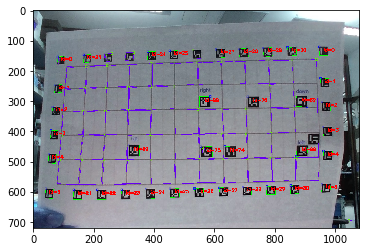

In [4]:
cv2.imwrite('result.png', photo)
plt.imshow(photo)

In [5]:
## extract unique and their index
uniqueValues, index = numpy.unique(ids, return_index=True)

In [6]:
## go through each vertical/ horizontal aruco to find unique and get their index
xaxis = []
yaxis = []

## this assumes aruco ids for row indicators are 0—5, and columns are 20—30.
for i in index:
    if (ids[i][0] <= 5) and (ids[i][0] >= 0):
        ## index markers for y-axis
        yaxis.append(i)
    if (ids[i][0] > 20) and (ids[i][0] < 31):
        ## index markers for x-axis
        xaxis.append(i)    
print(xaxis)
print(yaxis)

[5, 4, 3, 6, 8, 9, 10, 11, 12, 13]
[27, 2, 22, 20, 15, 7]


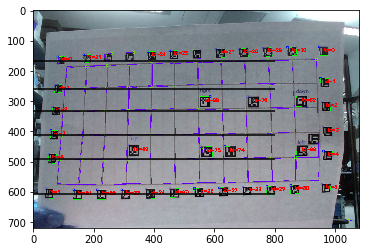

In [7]:
## go through the list and find midpoint for yaxis
ymidPoints = []
plt.imshow(photo)

for i in range(len(yaxis)):
    start = corners[yaxis[i]]
    startY = start[0][0][1]
    endY = start[0][2][1]
    d = (endY-startY) / 2
    ymidPoints.append(startY + d)
    plt.hlines(ymidPoints[i],0,800)
    # print(ids[yaxis[i]][0])
    # print(corners[yaxis[i]])
    # print(startY + d)

plt.show()

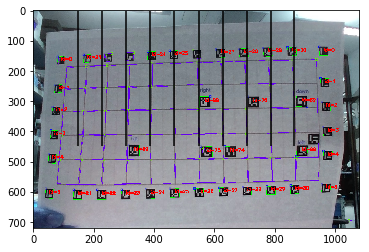

In [8]:
## go through the list and find midpoint for yaxis
xmidPoints = []
plt.imshow(photo)

for i in range(len(xaxis)):
    start = corners[xaxis[i]]
    startX = start[0][2][0]
    endX = start[0][0][0]
    d = (endX-startX) / 2
    xmidPoints.append(startX + d)
    plt.vlines(xmidPoints[i],0,450)
    # print(ids[yaxis[i]][0])
    # print(corners[yaxis[i]])
    # print(startY + d)

plt.show()

In [9]:
## check each ids that are not position markers and place them in position
mobjects = []
xplotobj = []
yplotobj = []
cols = []
rows = []
labels = []

## grabs all non-positional markers
for i in range(len(ids)):
    if ids[i][0] > 50:
        # extract indexes of musical objects and put into a list
        mobjects.append(i)

for i in range(len(mobjects)):
    sample = corners[mobjects[i]]
    cx = sample[0][0][0]
    cy = sample[0][0][1]
    
    # this is an arrow object
    ## let's determine its orientation
    if (ids[mobjects[i]] == 89):
        if (sample[0][0][0] - sample [0][2][0]) > 0:
            A = 1
        else:
            A = 0
            
        if (sample[0][0][1] - sample [0][2][1]) > 0:
            B = 1
        else:
            B = 0
            
        if A == 1 and B == 1:
            labels.append('S')
            print('down arrow')
        elif A == 1 and B == 0:
            labels.append('E')
            print('right arrow')
        elif A == 0 and B == 1:
            labels.append('W')
            print('left arrow')
        elif A == 0 and B == 0:
            labels.append('N')
            print('up arrow')
    
    elif (ids[mobjects[i]]== 70):
        # append label based on id
        labels.append('kick')
    elif (ids[mobjects[i]]== 71):
        # append label based on id
        labels.append('hat')
    elif (ids[mobjects[i]]== 72):
        # append label based on id
        labels.append('clap')
    elif (ids[mobjects[i]]== 73):
        # append label based on id
        labels.append('keys')
    elif (ids[mobjects[i]]== 74):
        # append label based on id
        labels.append('bass')
    elif (ids[mobjects[i]]== 75):
        # append label based on id
        labels.append('coin')
        
    if(cx < xmidPoints[0]):
        #xplotobj.append(xmidPoints[0])
        cols.append(1)
    
    for x in range(len(xmidPoints)-1):
        if(cx > xmidPoints[x]) and (cx < xmidPoints[x+1]):
            #xplotobj.append(xmidPoints[x])
            cols.append(x+2)
    
    if(cx > xmidPoints[len(xmidPoints)-1]):
        #xplotobj.append(xmidPoints[len(xmidPoints)-1])
        cols.append(len(xmidPoints)+1)
        
    for y in range(len(ymidPoints)-1):
        if(cy > ymidPoints[y]) and (cy < ymidPoints[y+1]):
            #yplotobj.append(ymidPoints[y])
            rows.append(y+1)
    if (cy < ymidPoints[0]):
        #yplotobj.append(ymidPoints[0])
        rows.append(1)

left arrow
up arrow
right arrow
down arrow


{'column': [7, 9, 8, 11, 4, 7, 11], 'rows': [4, 2, 4, 4, 4, 2, 2], 'tile_type': ['coin', 'kick', 'bass', 'W', 'N', 'E', 'S']}


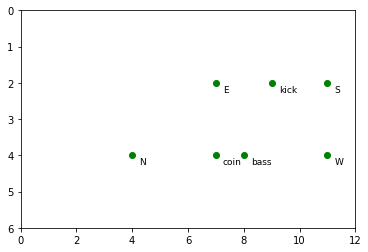

In [10]:
## check shape of rows, cols, and types
if(len(rows) != len(cols)) or (len(labels) != len(cols)) or (len(labels) != len(rows)):
    print('dim error!!')
else:
    tiles = {
        'column':cols,
        'rows': rows,
        'tile_type': labels
    }
    print(tiles)
    #plt.plot(cols,rows, '-o', ms=10, lw=0, alpha=0.7, mfc='orange')
    for i in range(len(mobjects)):
        x = cols[i]
        y = rows[i]
        plt.scatter(x, y, marker='o', color='green')
        plt.text(x+0.25, y+0.25, labels[i], fontsize=9)
    plt.xlim(0, 12)
    plt.ylim(6, 0)
    plt.show()
    #print(rows)
    #print(cols)
    #print(labels)

In [11]:
## use for finding edges
#for i in range(ids.shape[0]):
#    if(ids[i][0] == 896):
#        start = corners[i]
#        startX = start[0][2][0]
#        startY = start[0][2][1]
#        print(corners[i])

#for i in range(ids.shape[0]):
#    if(ids[i][0] == 60):
#        end = corners[i]
#        endX = end[0][0][0]
#        endY = end[0][0][1]
#        print(corners[i])
data = [cols, rows, labels]

In [12]:
{
    'column':cols,
    'rows': rows,
    'tile_type': labels
}

{'column': [7, 9, 8, 11, 4, 7, 11],
 'rows': [4, 2, 4, 4, 4, 2, 2],
 'tile_type': ['coin', 'kick', 'bass', 'W', 'N', 'E', 'S']}